# **DRY**  **BEAN** **CLASS PREDICTION**

**SUBMITTED** **BY** :      **JEZEERA** **P**

**PROJECT** **EVALUATION** **DATE** : **NOVEMBER 14- 2024**


Dry Beans are one of the most consumed edible legumes in the world. Seed
quality affects the crop production and revenue.Dry bean is the most popular pulse produced in the world.

It is hence essential to classify dry bean seeds for optimal production and max revenue as well as for sustainable farming.


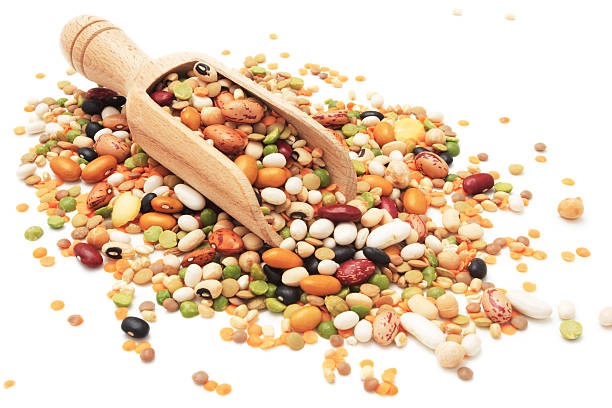

## **TABLE OF CONTENTS:**


1. Objective
2. Dataset information
3. Variable information
4. Tool used
5. EDA
6. Data Preprocessing
7. Visualization
8. Feature Engineering
9. Data Splitting
10. Model Selection
11. Model Training and Evaluation
12. Feature Selection
13. Pipeline
14. Saving the model
15. Load the model

### **OBJECTIVE**:

 The main problem dry bean producers and marketers face is in ascertaining good seed quality. Lower quality of seeds leads to lower quality of produce.

  Seed quality is the key to bean cultivation in terms of yield and disease. Manual classification and sorting of bean seeds is a difficult process.
  
  **Our objective is to use Machine learning techniques to do the automatic classification of seeds**.

This clearly is a multi class classification problem where we need to classify a Dry bean seed into one of the seven classes from **Seker**, **Barbunya**, **Bombay**, **Cali**, **Dermosan**, **Horoz** and **Sira**.


### **DATASET** **INFORMATION**:


Dataset DRY BEAN is taken from UC irvin ML repository.

Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation.

 A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification.

 For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera.

 Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

 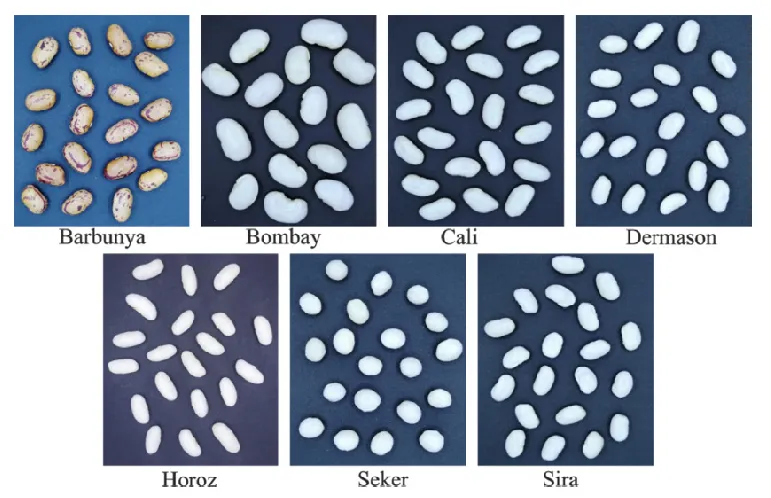


### **VARIABLE** **INFORMATION** :

THERE ARE 16 FEATURES AND 1 TARGET VARIABLE.

1.)**Area(A)**: The area of a bean zone and the number of pixels within its boundaries.

2.) **Perimeter (P**): Bean circumference is defined as the length of its border.

3.) **Major axis length (L)**: The distance between the ends of the longest line that can be drawn from a bean.

4.) **Minor axis length (l)**: The longest line that can be drawn from the bean while standing perpendicular to the main axis.

5.)**Aspect ratio (K)**: Defines the relationship between L and l.

6.) **Eccentricity (Ec**): Eccentricity of the ellipse having the same moments as the region.

7.) **Convex area (C)**: Number of pixels in the smallest convex polygon that can contain the area of a bean seed.

8.) **Equivalent diameter** (Ed): The diameter of a circle having the same area as a bean seed area.

9.)**Extent** (Ex): The ratio of the pixels in the bounding box to the bean area.

10.)**Solidity** (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.

11.)**Roundness** (R): Calculated with the following formula: (4piA)/(P^2)

12.)**Compactness**(CO): Measures the roundness of an object: Ed/L

13.)**ShapeFactor1** (SF1)

14.)**ShapeFactor2** (SF2)

15.)**ShapeFactor3** (SF3)

16.)**ShapeFactor4** (SF4)

17.)**Class** (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

### **TOOL** **USED**:

The entire analysis was done using Python and its ML frameworks:





numpy, pandas, matplotlib,
seaborn, scikit-learn .

Google Colab a free cloud version of jupyter notebook was used.

# **EXPLORATORY DATA ANALYSIS**

EDA is conducted at the beginning of a project to understand the dataset and gain insights that can guide further analysis.
It involves cleaning, summarizing, and visualizing data to understand their characteristics.

## **DATA** **PREPROCESSING**

## **Importing Libraries**

In [180]:
# Importing all the necessary libraries


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from scipy.stats import iqr, zscore, skew
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import  classification_report, accuracy_score, roc_auc_score
import joblib
from pathlib import Path
from scipy.stats import iqr, zscore, skew
from prettytable import PrettyTable, MSWORD_FRIENDLY, DEFAULT, PLAIN_COLUMNS
from plotly.subplots import make_subplots

from IPython.display import Image, display

import warnings

warnings.filterwarnings("ignore")



**Load** **the** **dataset**

In [181]:
data=pd.read_csv("/content/DryBean_Dataset2.csv")
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


**Understanding** **the** **data** **structure**

In [182]:
#Display first 5 rows

data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [183]:
#Display last 5 rows

data.tail()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON
13610,42159,772.237,295.142741,182.204716,1.619841,0.786693,42600,231.686223,0.788962,0.989648,0.888380,0.784997,0.007001,0.001640,0.616221,0.998180,DERMASON


In [184]:
# Data Information: It contains information about data types.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

All attributes are numerical type except the class attribute which contains Bean Type.

 Output shows that there in no-null values .

 Output shows that there are three types of data,
  1. integer: Area, ConvexArea,
  2. String/Object: Class,
  3. float: other features.

In [185]:
#Give summary of numerical data

data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


This gives the Descriptive Statistics of Numerical Attributes.

That is, mean values of each features and minimum maximum values in each features.etc

**DETECT** **MISSING** **VALUES**

In [186]:
data.isnull().sum()

,0
Area,0
Perimeter,0
MajorAxisLength,0
MinorAxisLength,0
AspectRation,0
Eccentricity,0
ConvexArea,0
EquivDiameter,0
Extent,0
Solidity,0


As we can see, the dataset is fairly complete with no missing or na values. So, we don't need to deal with them

### **CHECK** **DUPLICATES**

In [187]:
print(f'Duplicate rows in the datsaset :{data.duplicated().sum()}\n')

print('Bean type of duplicated rows:')
print(data[data.duplicated()].Class.value_counts())

Duplicate rows in the datsaset :68

Bean type of duplicated rows:
Class
HOROZ    68
Name: count, dtype: int64


In [188]:
#Drop duplicates from dataset

data=data.drop_duplicates()

In [189]:
data.shape

(13543, 17)

There are 68 duplicates values in the dataset and they are removed (Data reduced to 13543 from 13611)

# **DATA** **VISUALIZATION**

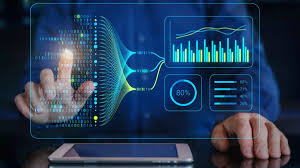

## **DISTRIBUTION** **OF** **CLASS**

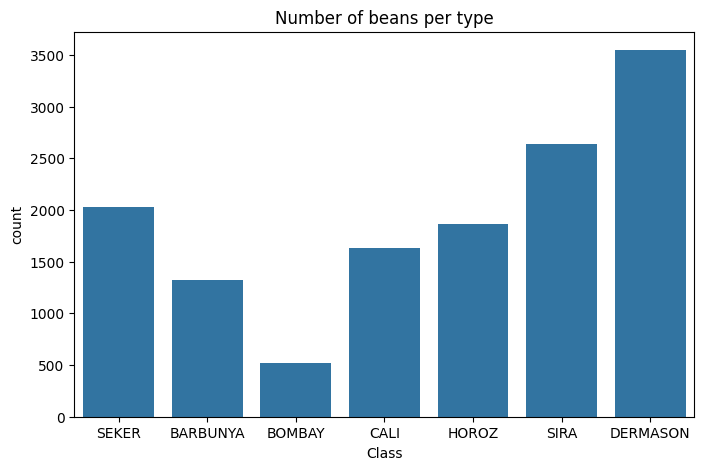

In [190]:
plt.figure(figsize = (8, 5))
sns.countplot(x = data["Class"])
plt.title("Number of beans per type")
plt.show()

We have got 7 classes and above are the counts of the classes.

As, we can see that the majority class is DERMASON and minority one is BOMBAY.

The data is imbalanced as BOMBAY has only 500 examples where as DERMASON has 3500 examples.

so we have to balance the data using smoteen

## **UNIVARIATE** **ANALYSIS**

visulaize individual series.


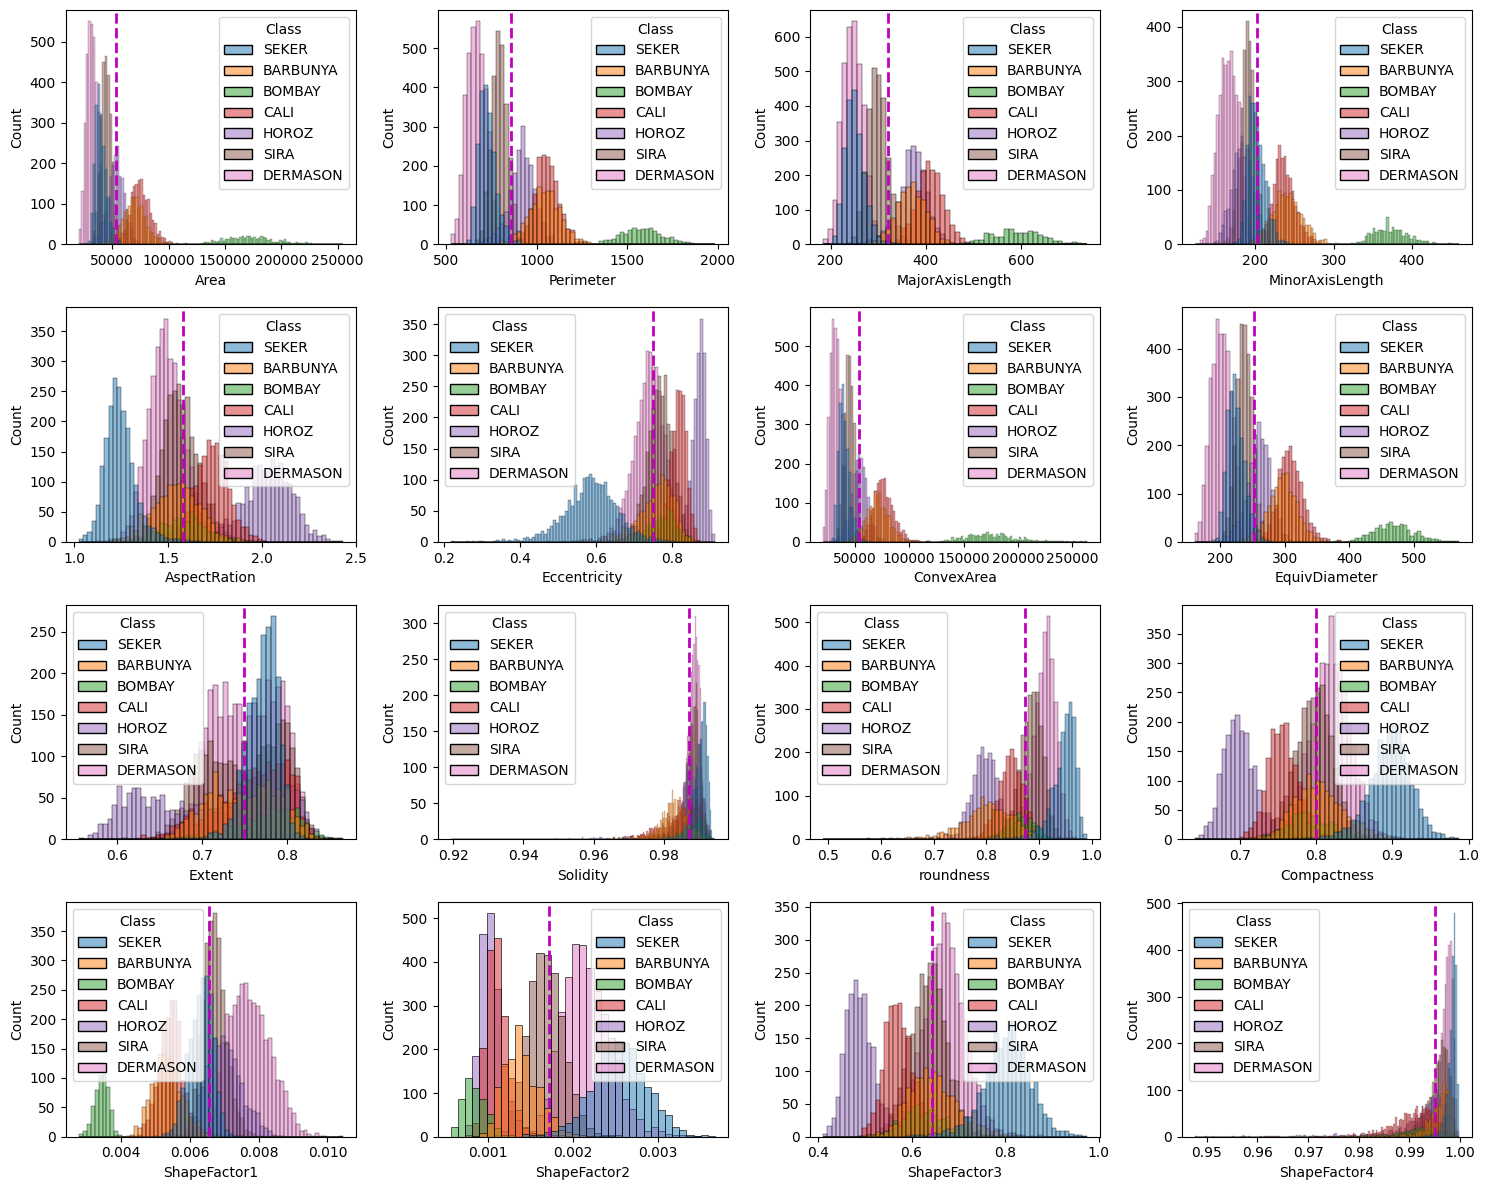

In [191]:

numerical_cols = data.drop(columns=['Class']).columns
numerical_features = ['Class']

fig, ax = plt.subplots(4, 4, figsize=(15, 12))
for variable, subplot in zip(numerical_cols, ax.flatten()):
    g=sns.histplot(data,x=variable, ax=subplot,hue='Class')

    g.axvline(x=data[variable].mean(), color='m', label='Mean', linestyle='--', linewidth=2)
plt.tight_layout()



*   BOMBAY class can be differentiated easily using any feature
*   Other classes have a lot of overlap and are not easy to distinguish



## **BIVARIATE** **ANALYSIS**

○ Visualize the relationship between two variables using scatter plots
plots (sns.scatterplot())

Text(0.5, 1.0, 'area v/s perimeter')

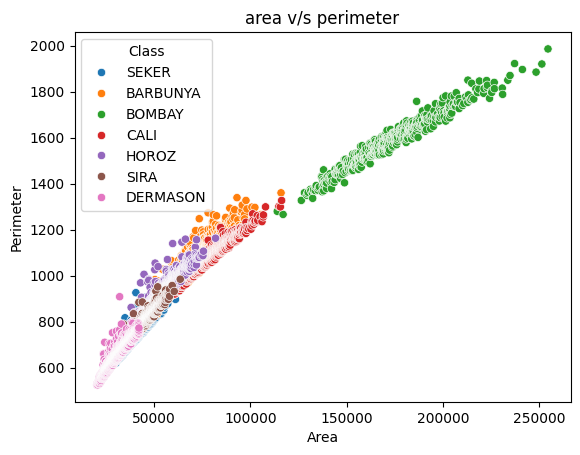

In [192]:
sns.scatterplot(data=data, x="Area", y="Perimeter", hue="Class")
plt.title('area v/s perimeter')

We observe that area is directly related to the perimeter .

BOMBAY class has the highest area and perimeter while the DERMASON class the lowest.

Text(0.5, 1.0, 'Area v/s ShapeFactor4')

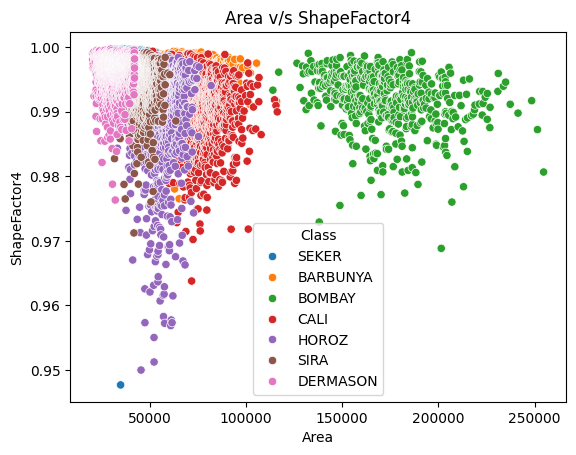

In [193]:
sns.scatterplot(data=data, x="Area", y="ShapeFactor4", hue="Class")
plt.title('Area v/s ShapeFactor4')

From Shapefactor4 we can see Bombay has the dominance in size

Text(0.5, 1.0, ' ConvexArea v/s area ')

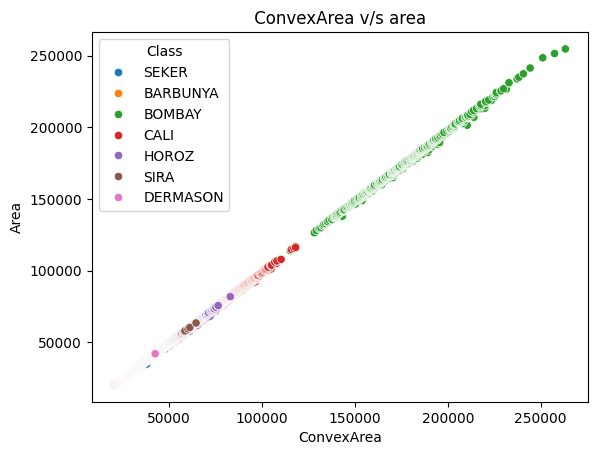

In [194]:
sns.scatterplot(data=data, x="ConvexArea", y="Area", hue="Class")
plt.title(" ConvexArea v/s area ")

ConvexArea and Area have a direct correlation. i.e., As ConvexArea increases the Area increases.

## **VIOLIN** **PLOT**

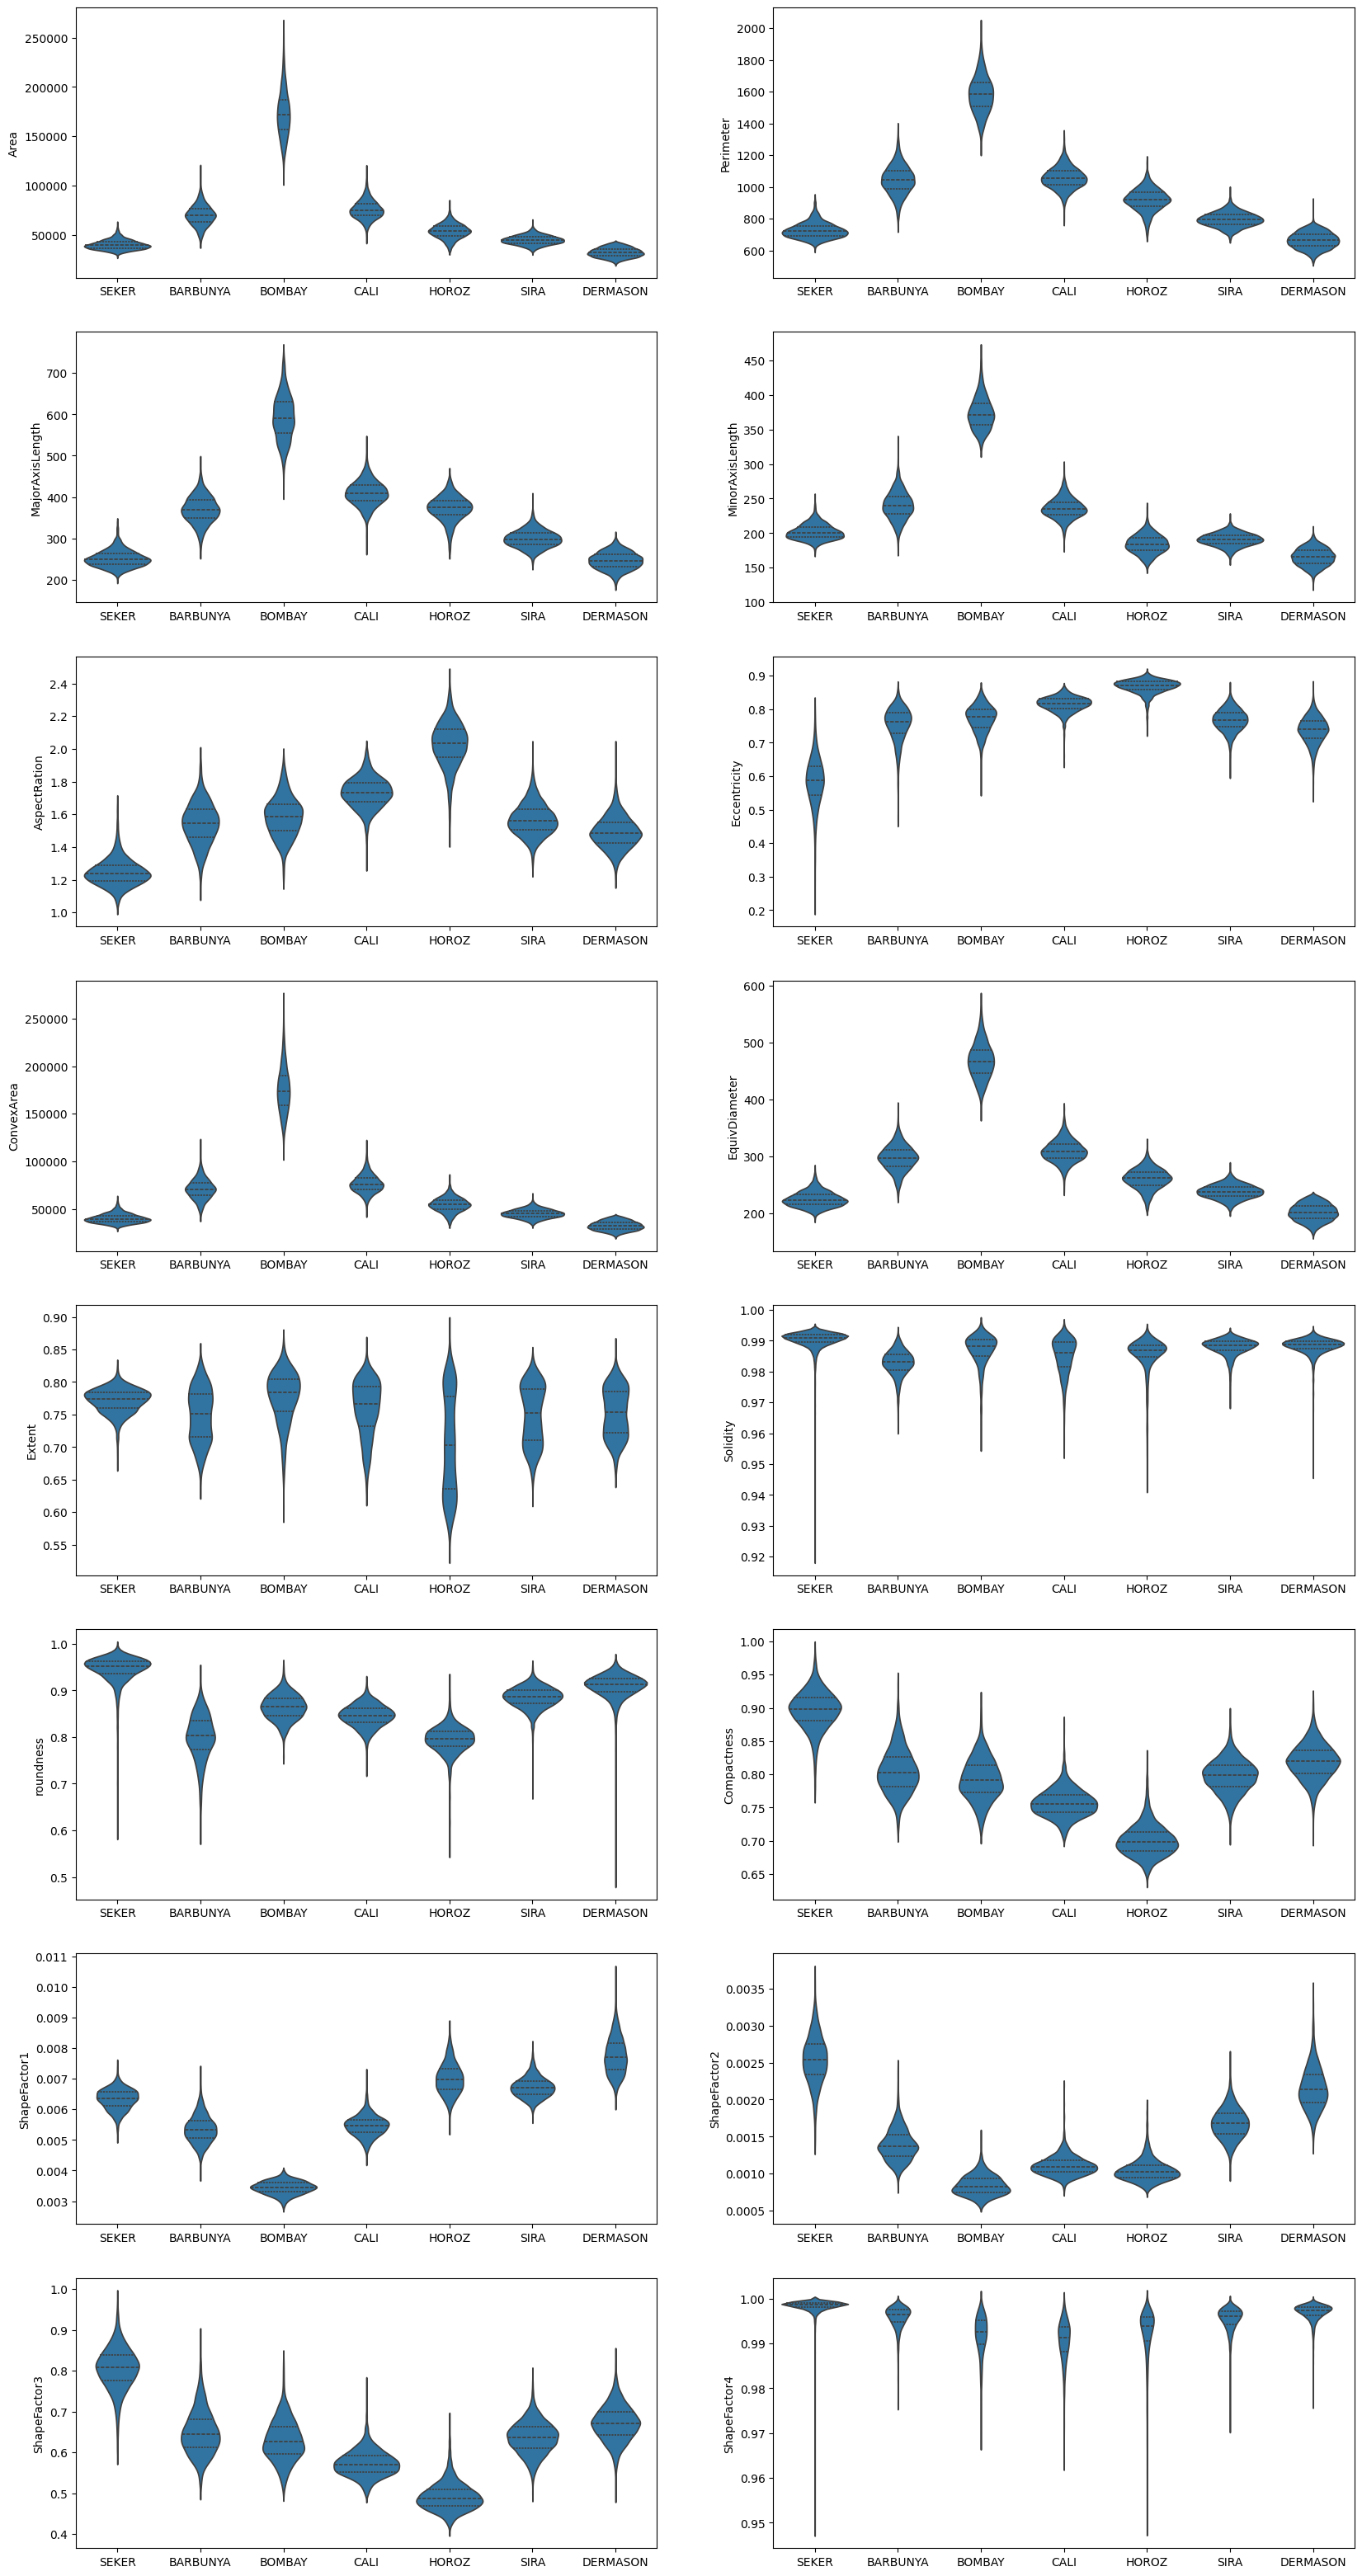

In [195]:
fig, axes = plt.subplots(8, 2, figsize = (20, 40))
for feature, ax in zip(data.columns.drop("Class"), axes.flatten()):
    sns.violinplot(data=data,
                   x="Class",
                   y=feature,
                   inner="quartile",
                   ax=ax)
    ax.set(xlabel=None)
plt.show()

when we observe physical appearance ,BOMBAY beans distinguish in all of 7 because of its AREA,SIZE,PERIMETER

SEKER & SIRA & DERMASON show simalirity

We can see lots of simalirity in 'Barbunya' & 'Cali'

# **MULTIVARIATE** **ANALYSIS**

Use pair plots, heatmaps for correlation

In [196]:
# Define features and target variable
x = data.drop('Class', axis=1)
y = data['Class']
corr=x.corr()
corr

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.966908,0.932623,0.952041,0.243698,0.268580,0.999940,0.984998,0.054648,-0.197333,-0.359068,-0.269797,-0.848390,-0.641208,-0.273754,-0.358019
Perimeter,0.966908,1.000000,0.977561,0.914336,0.386097,0.391062,0.967871,0.991453,-0.020620,-0.304662,-0.548336,-0.407426,-0.865756,-0.768590,-0.408888,-0.431215
MajorAxisLength,0.932623,0.977561,1.000000,0.828360,0.550075,0.541011,0.933392,0.962271,-0.077287,-0.284857,-0.595710,-0.567902,-0.775840,-0.859401,-0.567607,-0.484464
MinorAxisLength,0.952041,0.914336,0.828360,1.000000,-0.005354,0.022391,0.951780,0.949214,0.145906,-0.156819,-0.214090,-0.018618,-0.947194,-0.475326,-0.022744,-0.266402
AspectRation,0.243698,0.386097,0.550075,-0.005354,1.000000,0.924185,0.245267,0.305237,-0.371234,-0.269110,-0.764975,-0.987644,0.020875,-0.837338,-0.978528,-0.451598
Eccentricity,0.268580,0.391062,0.541011,0.022391,0.924185,1.000000,0.270350,0.319360,-0.319678,-0.298282,-0.720138,-0.970308,0.017266,-0.859246,-0.981058,-0.450611
ConvexArea,0.999940,0.967871,0.933392,0.951780,0.245267,0.270350,1.000000,0.985255,0.052864,-0.206901,-0.363620,-0.271651,-0.848382,-0.642773,-0.275631,-0.364302
EquivDiameter,0.984998,0.991453,0.962271,0.949214,0.305237,0.319360,0.985255,1.000000,0.028762,-0.232344,-0.437189,-0.328980,-0.893403,-0.714693,-0.331594,-0.394693
Extent,0.054648,-0.020620,-0.077287,0.145906,-0.371234,-0.319678,0.052864,0.028762,1.000000,0.192268,0.344510,0.354912,-0.141525,0.237584,0.348226,0.148622
Solidity,-0.197333,-0.304662,-0.284857,-0.156819,-0.269110,-0.298282,-0.206901,-0.232344,0.192268,1.000000,0.609668,0.304802,0.154346,0.344337,0.308614,0.700150


<Axes: >

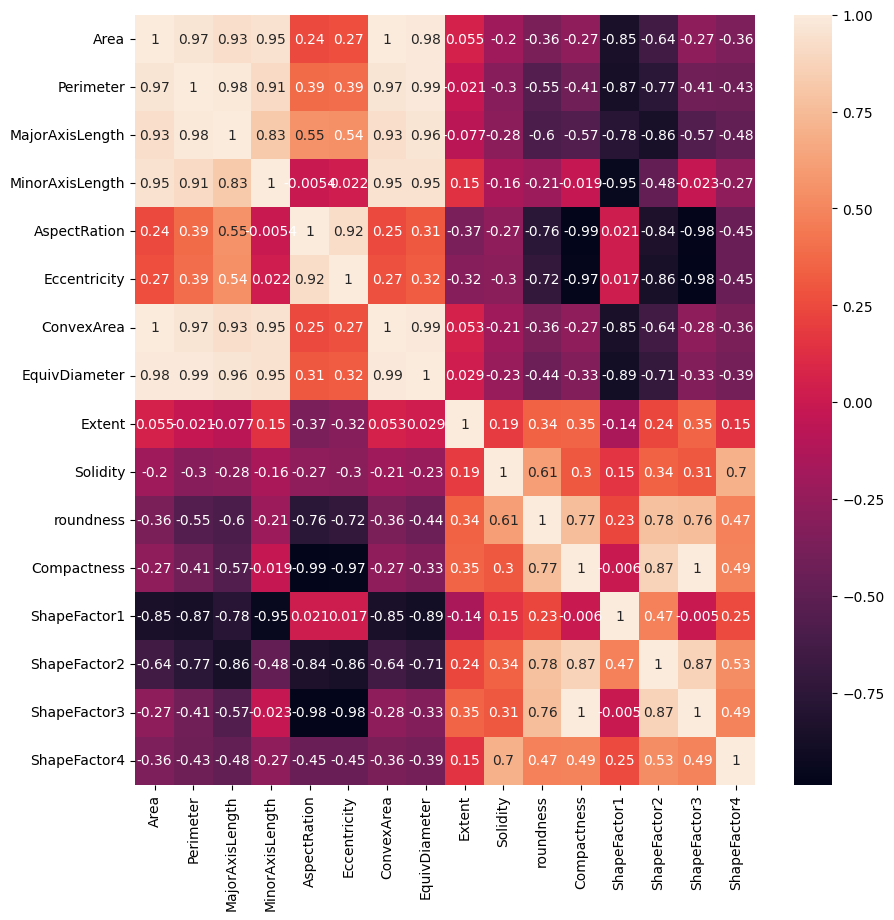

In [197]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(x.corr(),annot=True)

There a lot of highly correlated attributes in the above correlation matrix, for eg:

Area & Convex Area:1

Shaped Factor3 & Comapctness:1

Aspect ratio & compactness: -0.99

Area & Perimeter: 0.97

Perimeter & ShapeFactor1: -0.87

Aspect ratio & Eccentricity: 0.92

As, we can see that most of our features are highly correlated either negatively or positively.

My hypothesis is even if we use very less features, we will still be able to describe our data well.

# **OUTLIER** **HANDLING**

Outliers are single data points that goes far way(differ) from the the average values of data.

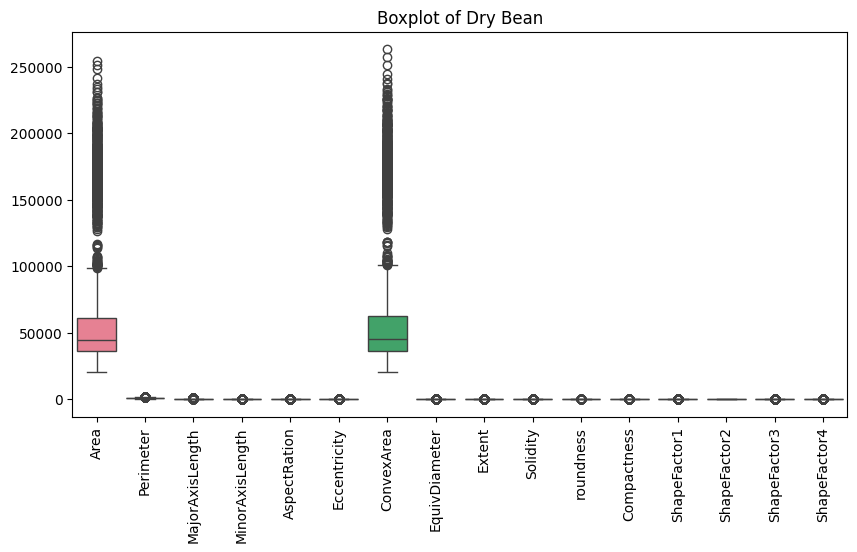

In [198]:
# Check outlier of Dry Bean features
plt.figure(figsize = (10, 5))
feature_columns=data.columns[:-1]
sns.boxplot(data[feature_columns])
plt.title("Boxplot of Dry Bean")
plt.xticks(rotation = 90)
plt.show()


Here, from this boxplot of each features, it is seen that Area and ConvexArea have lots of outliers above 10,0000.

so we can set boundary 10,0000 to remove many outliers

In [199]:
# Delete outlier of "Area" & "ConvexArea"
data = data[(data["Area"] < 100000) | (data["ConvexArea"] < 100000)]


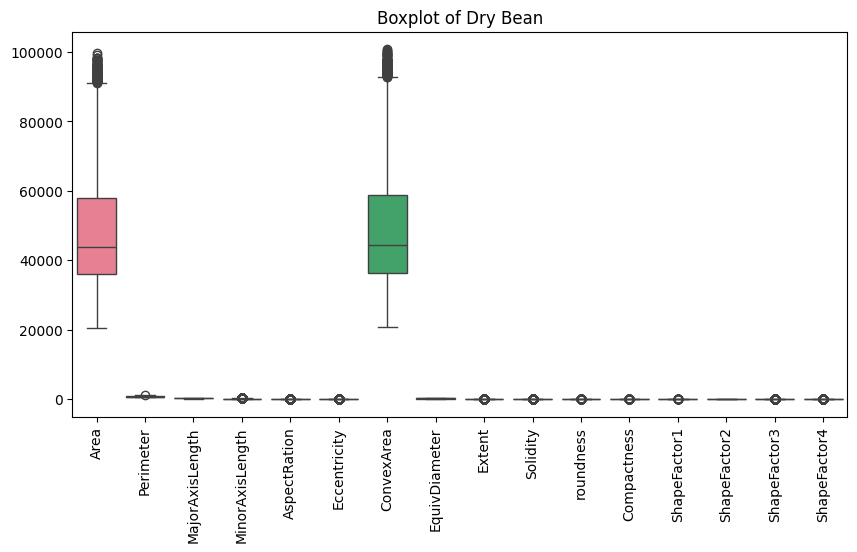

In [200]:
# Check Dry Bean features which outliers are deleted
plt.figure(figsize = (10, 5))
sns.boxplot(data[feature_columns])
plt.title("Boxplot of Dry Bean")
plt.xticks(rotation = 90)
plt.show()

In [201]:
data.shape

(12994, 17)

Around 600 datas are removed due to outliers.

## **DATA** **TRANSFORM**

Encode the class labels using LabelEncoder.

Standardize the features using StandardScaler

In [202]:
X = data.drop('Class', axis=1)
Y = data['Class']

In [203]:


pd.DataFrame(Y).value_counts()

,count
Class,
DERMASON,3546
SIRA,2636
SEKER,2027
HOROZ,1860
CALI,1608
BARBUNYA,1317


Handling the imbalance data using **SMOTEENN**.

smoteenn is the combination of under and over sampling method

In [204]:
#ENCODE THE CLASS

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Class"] = le.fit_transform(data["Class"])

In [205]:
X = data.drop('Class', axis=1)
Y = data['Class']

In [206]:
#SMOTTEEN TO BALANCE TARGET

from imblearn.combine import SMOTEENN

sme = SMOTEENN()
x_sme, y_sme = sme.fit_resample(X, Y)

In [207]:
pd.DataFrame(y_sme).value_counts()

,count
Class,
2,2492
3,2482
4,2446
1,2264
0,2186
5,2090


NOW THE CLASS IS ALMOST BALANCED.

# **SPLIT** **THE** **DATASET**

In [208]:
#spiltiing the data into train and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_sme, y_sme, test_size = 0.2, random_state = 0)

In [209]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [210]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (11168, 16) (11168,)
Test set: (2792, 16) (2792,)


# **FEATURE ENGINEERING**


By using feature importance method findout important features whichever we can apply for further process.

In [211]:
from sklearn.feature_selection import SelectKBest, f_classif

In [212]:
# Create a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(x, y)

RandomForestClassifier(random_state=42)

In [213]:
# Get feature importances
importances = model.feature_importances_
# Create a DataFrame to display feature importances
feature_importance_data = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_data)

            Feature  Importance
11      Compactness    0.095072
1         Perimeter    0.094900
14     ShapeFactor3    0.093823
12     ShapeFactor1    0.084400
2   MajorAxisLength    0.083854
6        ConvexArea    0.080757
3   MinorAxisLength    0.078571
5      Eccentricity    0.069945
7     EquivDiameter    0.059566
10        roundness    0.055341
0              Area    0.052377
4      AspectRation    0.048735
13     ShapeFactor2    0.041133
15     ShapeFactor4    0.031262
9          Solidity    0.018437
8            Extent    0.011825


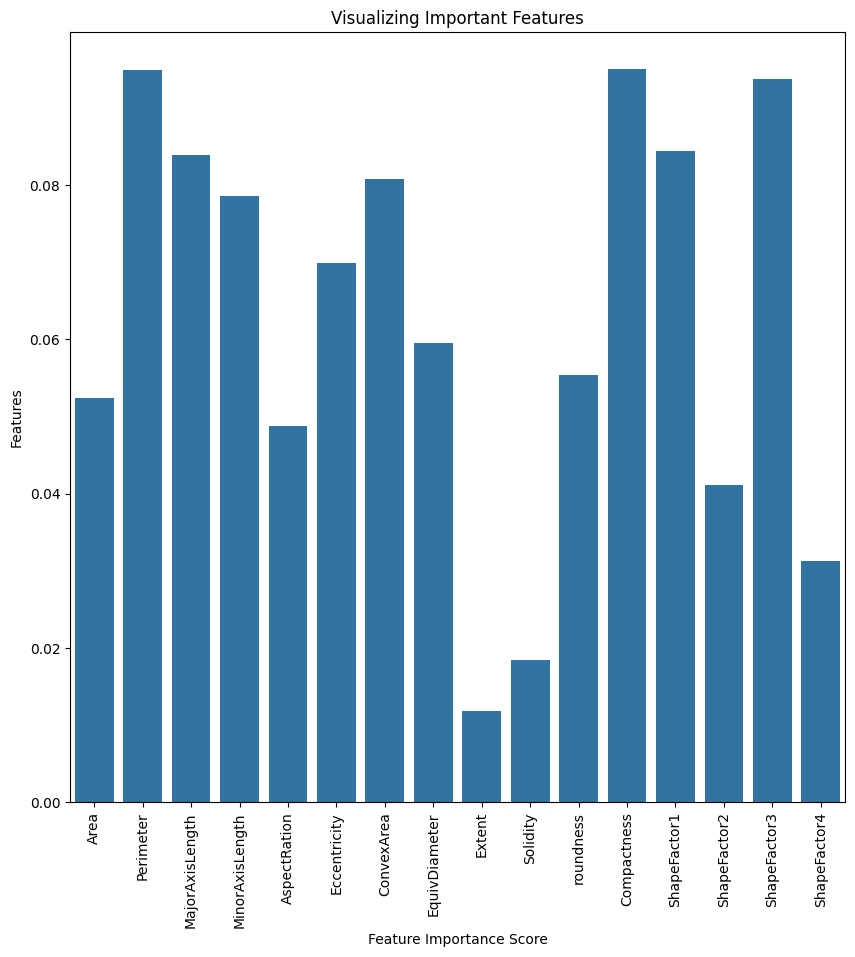

In [214]:
# graph size
plt.figure(figsize=(10,10))

# Creating a bar plot
sns.barplot(x=x.columns, y=importances)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.xticks(rotation = 90)
plt.show()



*  PERIMETER , COMPACTNESS, SHAPEFACTOR 1,3 are the best features.

*  EXTEND, SOLIDITY, SHAPEFACTOR 4,2  are least important features.

so we dont need all the features to predict the class.Only necessary features which are important to the data are needed.



# **ML** **MODEL** **BUILDING**


This stage of the project focuses on training and evaluating different models to determine the best one for the task at hand.

SUPERVISED LEARNING MODELS ARE:

*   **Logistic Regression**
*   **Support Vector Machines (SVM)**
*   **Decision Tree**
*   **Random Forest**
*   **K-Nearest Neighbor (KNN)**









## **LOGISTICS** **REGRESSION**

The central concept behind Logistic Regression is predicting the outcome of a categorical dependent variable based on one or more independent variables. In classification, it models the probability that a given input data point belongs to a particular category.

In [215]:
# Train the Logistic Regression model
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state = 0, max_iter = 500)

LR_params = {'C': [0.01, 0.1, 1, 10]}
LR_grid = GridSearchCV(LR, LR_params, cv=5)
LR_grid.fit(X_train, y_train)

# Find the predicted classes of the x_test set
y_pred_LR = LR_grid.predict(X_test)

# Summarize the precision, recall, accuracy, and f1 score of the model
LR_report = metrics.classification_report(y_test, y_pred_LR)
print(LR_report)
LR_accuracy = accuracy_score(y_test, y_pred_LR)
print('Accuracy : ', "%.2f" % (LR_accuracy*100))


              precision    recall  f1-score   support

           0       0.99      0.98      0.98       417
           1       0.97      0.99      0.98       429
           2       0.99      0.99      0.99       506
           3       0.99      0.99      0.99       512
           4       0.99      0.99      0.99       496
           5       0.97      0.98      0.98       432

    accuracy                           0.99      2792
   macro avg       0.99      0.99      0.99      2792
weighted avg       0.99      0.99      0.99      2792

Accuracy :  98.57


## **SVM**

Given a linear kernel, an SVM finds the hyperplane (straight line or plane) that best separates different classes in the feature space. A hyperplane serves as a boundary between different categories of data points. The feature space is where the data points exist, with each axis representing a distinct data attribute.

In [216]:
# Train the Linear Kernel Support Vector Machines model
SVM = SVC(kernel = 'linear', random_state = 0)

SVM_params = {'C': [0.1,1], 'kernel': ['linear', 'rbf']}
SVM_grid = GridSearchCV(SVM,SVM_params, cv=5)
SVM_grid.fit(X_train, y_train)

# Find the predicted classes of the x_test set
y_pred_SVM = SVM_grid.predict(X_test)
# Summarize the precision, recall, accuracy, and f1 score of the model
SVM_report = metrics.classification_report(y_test, y_pred_SVM)
print(SVM_report)

SVM_accuracy = accuracy_score(y_test, y_pred_SVM)
print('Accuracy : ', "%.2f" % (SVM_accuracy*100))


              precision    recall  f1-score   support

           0       0.99      0.97      0.98       417
           1       0.97      0.99      0.98       429
           2       0.99      0.99      0.99       506
           3       0.99      0.98      0.99       512
           4       0.99      0.99      0.99       496
           5       0.97      0.98      0.98       432

    accuracy                           0.98      2792
   macro avg       0.98      0.98      0.98      2792
weighted avg       0.98      0.98      0.98      2792

Accuracy :  98.46


## **DECISION TREE**

As a classification model, a Decision Tree is an adaptable algorithm that divides the input space into homogenous regions with respect to the target variable. The primary benefits of using a decision tree are its versatility and interpretability.

In [217]:
# Train the Decision Tree model
DT = DecisionTreeClassifier()

DT_params = {'max_depth': [2,3, 5, 7]}
DT_grid = GridSearchCV(DT, DT_params, cv=5)
DT_grid.fit(X_train, y_train)

# Find the predicted classes of the x_test set
y_pred_DT = DT_grid.predict(X_test)

# Summarize the precision, recall, accuracy, and f1 score of the model
DT_report = metrics.classification_report(y_test, y_pred_DT)
print(DT_report)
DT_accuracy = accuracy_score(y_test, y_pred_DT)
print('Accuracy : ', "%.2f" % (DT_accuracy*100))


              precision    recall  f1-score   support

           0       0.98      0.95      0.97       417
           1       0.94      0.98      0.96       429
           2       0.99      0.98      0.98       506
           3       0.99      0.99      0.99       512
           4       0.98      0.99      0.99       496
           5       0.98      0.97      0.97       432

    accuracy                           0.98      2792
   macro avg       0.98      0.98      0.98      2792
weighted avg       0.98      0.98      0.98      2792

Accuracy :  97.82


## **RANDOM FOREST**

Rather than relying on a singular decision tree, the random forest model constructs many decision trees during training and puts the mode of the classes of the individual trees into practice. This method reduces overfitting and increases the overall accuracy of the model.

In [218]:
# Train the Random Forest model
RF = RandomForestClassifier(n_estimators = [10], criterion = 'entropy', random_state = 0)

RF_params = {'n_estimators': [10,50, 100, 150], 'max_depth': [2,3, 5, 7]}
RF_grid = GridSearchCV(RF, RF_params, cv=5)
RF_grid.fit(X_train, y_train)

# Find the predicted classes of the x_test set
y_pred_RF = RF_grid.predict(X_test)

# Summarize the precision, recall, accuracy, and f1 score of the model
RF_report = metrics.classification_report(y_test, y_pred_RF)
print(RF_report)

RF_accuracy = accuracy_score(y_test, y_pred_RF)
print('Accuracy : ', "%.2f" % (RF_accuracy*100))



              precision    recall  f1-score   support

           0       0.99      0.96      0.97       417
           1       0.96      0.99      0.97       429
           2       1.00      0.99      0.99       506
           3       1.00      0.98      0.99       512
           4       0.99      0.99      0.99       496
           5       0.97      0.99      0.98       432

    accuracy                           0.98      2792
   macro avg       0.98      0.98      0.98      2792
weighted avg       0.98      0.98      0.98      2792

Accuracy :  98.46


## **KNN**

NN classifies the test data points based on the similarity measure to the training data. The algorithm calculates the distance between a test data point and all other points in the training set. Based on this distance metric, It selects the K nearest data points (neighbors). Then, the algorithm assigns the test data point to the most common class among its K nearest neighbors.



In [219]:
# Train the K-Nearest Neighbor model
KNN = KNeighborsClassifier(n_neighbors =[3, 5,7,9], metric = 'minkowski', p = 2)

KNN_params = {'n_neighbors': [3, 5,7,9]}
KNN_grid = GridSearchCV(KNN,KNN_params, cv=5)
KNN_grid.fit(X_train, y_train)


# Find the predicted classes of the x_test set
y_pred_KNN = KNN_grid.predict(X_test)

# Summarize the precision, recall, accuracy, and f1 score of the model
KNN_report =  metrics.classification_report(y_test, y_pred_KNN)
print(KNN_report)

KNN_accuracy = accuracy_score(y_test, y_pred_KNN)
print('Accuracy : ', "%.2f" % (KNN_accuracy*100))




              precision    recall  f1-score   support

           0       0.99      0.97      0.98       417
           1       0.97      0.99      0.98       429
           2       1.00      0.98      0.99       506
           3       0.99      0.99      0.99       512
           4       0.99      1.00      0.99       496
           5       0.97      0.99      0.98       432

    accuracy                           0.99      2792
   macro avg       0.99      0.99      0.99      2792
weighted avg       0.99      0.99      0.99      2792

Accuracy :  98.64


  **Model** **Training** **and** **Hyperparameter** **Tuning**:

 The code performs hyperparameter tuning as before. Metrics Calculation: After tuning, it calculates accuracy, precision, recall, F1 score, and ROC AUC score for each model on the test set.

**Accuracy**: Measures the overall correctness of the model.

**Precision**: Measures the accuracy of positive predictions.

**Recall**: Measures the ability to find all positive samples.

**F1** **Score**: Harmonic mean of precision and recall.

**ROC** **AUC**: Measures the ability of the model to distinguish between classes.

Results Visualization: Finally, it presents the results in a DataFrame for easier comparison.




## **MODEL EVALUATION**



In [227]:
# Store the accuracies in a dictionary
accuracies = {
    'Random Forest': 98.46,
    'Decision Tree': 97.82,
    'Logistic Regression': 98.57,
    'SVM': 98.46,
    'KNN': 98.64
}

# Find the model with the highest  accuracy
best_model = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model]

# Display the best model and its accuracy
print(f"The model with the highest accuracy is: {best_model}")
print(f"Highest Accuracy: {best_accuracy:.4f}")

The model with the highest accuracy is: KNN
Highest Accuracy: 98.6400



**KNN model performed the best among the eight supervised learning classification models, boasting a score of 98.65%.**

# **PIPELINE** **SETTING**

A pipeline is a sequence of interconnected processing elements or components arranged in a sequence to automate and streamline complex workflows, commonly used in data processing, machine learning, and software development.

In [230]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df= pd.read_csv("/content/DryBean_Dataset2.csv")

# Drop unnecessary columns
df.drop(columns=['Extent','Solidity','ShapeFactor2','ShapeFactor4'], inplace=True)

# Define features and target variable
x = df.drop('Class', axis=1)
y = df['Class']

# Identify categorical and numerical features
categorical_features = x.select_dtypes(include="object").columns.tolist()  # ['class']
numerical_features = ['ShapeFactor1','Perimeter','MinorAxisLength','Compactness','ShapeFactor3','ConvexArea',
'Eccentricity'] # Numerical features

# Define individual transformers for preprocessing
trf_numerical = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values in Age with the mean
    ('scaler', StandardScaler())  # Scale the numerical features
])

trf_categorical = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values in Embarked with the most frequent
    ('label_encoding', LabelEncoder())  # One-hot encoding
])

# Create the main ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', trf_numerical, numerical_features),
        ('cat', trf_categorical, categorical_features),
    ],
    remainder='drop'  # Drop any remaining columns (none in this case)
)

# Create the full pipeline with a classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())  # Classifier
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Display accuracy on the test set
print("Accuracy on the test set:", accuracy)


Accuracy on the test set: 0.9107601909658465


In [231]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ShapeFactor1', 'Perimeter',
                                                   'MinorAxisLength',
                                                   'Compactness',
                                                   'ShapeFactor3', 'ConvexArea',
                                                   'Eccentricity']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('label_encoding',
                                                                   LabelEncoder())]),
                                                  [])])),
                ('classifier', KNeighborsClassifier())])

## **TRY IT ON SOME UNSEEN DATA**

In [233]:
# Prepare unseen data
unseen_data = pd.DataFrame({'ShapeFactor1':[0.00656],
'Perimeter':[550],'MinorAxisLength':[190],'Compactness':[0.9562],'ShapeFactor3':[0.9236],'ConvexArea':[30417],
'Eccentricity':[0.35],'EquivDiameter':[196.325],'MajorAxisLength':[215.126],
'Area':[30010],'AspectRation':[1.123],'roundness':[0.9756]     })

# Make predictions on the unseen data
unseen_predictions = pipeline.predict(unseen_data)

# Display predictions for the unseen data
print("Predictions for unseen data:", unseen_predictions)


Predictions for unseen data: ['SEKER']


# **SAVE** **THE** **MODEL**


Joblib and Pickle are the modules for saving the models

In [234]:
!pip install joblib

In [236]:
import joblib

# Save the pipeline to a file
joblib.dump(pipeline, 'drybean_pipeline.joblib')


['drybean_pipeline.joblib']

## **LOAD** **THE** **MODEL**

We can load the model and check for unseen datas ,

i.e, we can predict the class of drybean of sample data by using the model which I have created.

In [237]:
# Load the pipeline from the file
loaded_pipeline = joblib.load('drybean_pipeline.joblib')

# Now you can use the loaded pipeline to make predictions
unseen_predictions = loaded_pipeline.predict(unseen_data)
print("Predictions for unseen data using loaded pipeline:", unseen_predictions)

Predictions for unseen data using loaded pipeline: ['SEKER']


# **CONCLUSION**

In this project, we developed a machine learning model to predict CLASS of dry bean using the best features.

By using this project we can Saves hours of manual sorting and classification of seeds.

Food authentication in the industries and global market, is always a big challege. Claim over grade and no adulteration with other varities, increases the price of the prdouct. This study tries to classifiy the dry beans in seven different varities on the basis of 16 different features.

### **FUTURE WORKS:**

More ML algorithm can be used to find more accurate best ML model for class prediction.

We can learn more about uses from the paper and update our models accordingly.